<a href="https://colab.research.google.com/github/YASH-2906/Internship-studio-ML-project/blob/master/IS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

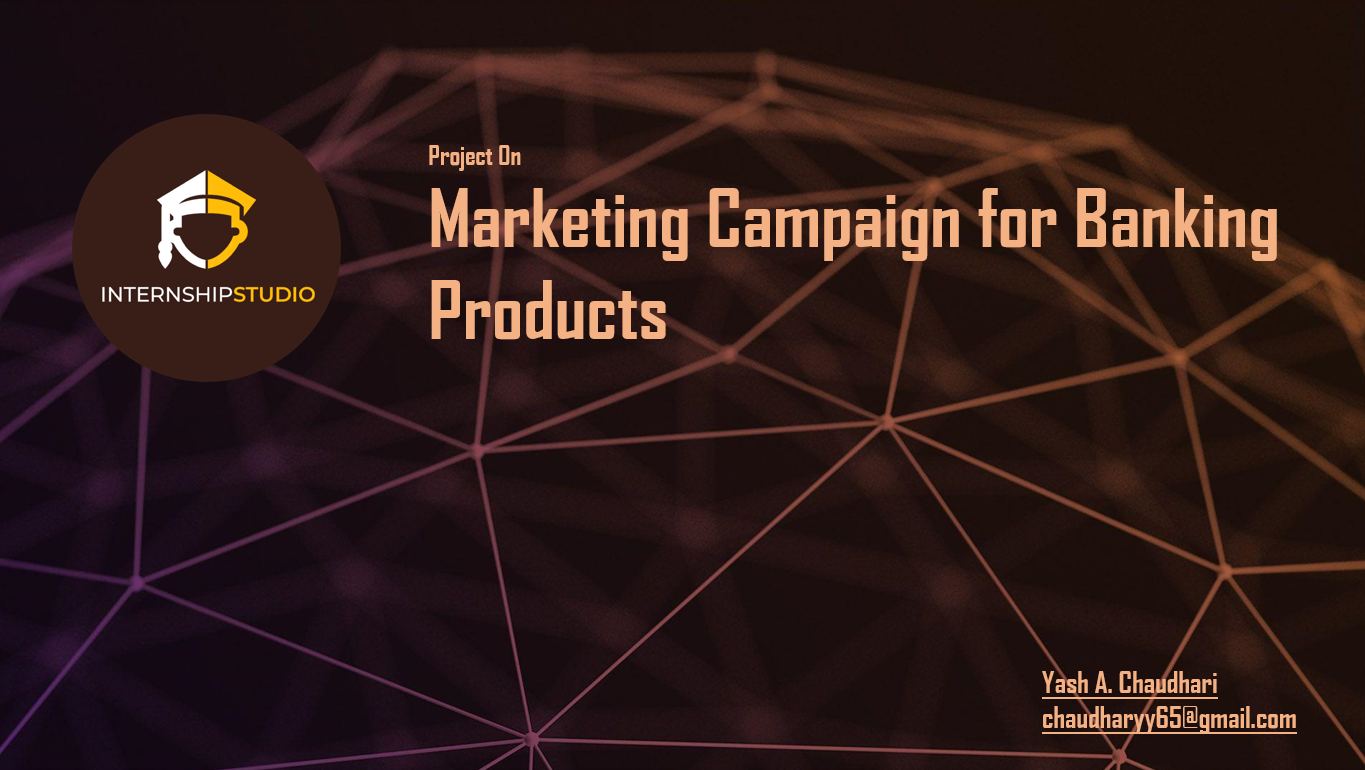

# **STEP 1: Import the datasets and libraries, check datatype, statistical summary, shape, nullvalues, etc.**

1.1 Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

**NOTE**: Libraries for various classifiers and analysis has been done before application of respective technique

1.2 Importing Dataset

In [13]:
dt = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
#checking file successfully imported or not
dt.tail(10) #last 10 rows of the data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


1.3  Checking Datatype

In [14]:
dt.dtypes #gives data type of each variable 

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

1.4 Statistical Summary

In [15]:
dt.describe() # gives diffrent statastical attributes of the data 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


1.5  Shape 

In [16]:
dt.shape
#Returs (No. of rows, No. of column)

(5000, 14)

1.6 Nullvalues

In [17]:
dt.info()
dt.isnull().sum()  #Total no. of null values for each variable 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Description of the variables**

* ID: Customer ID

* Age: Customer’s age in completed years

* Experience: years of professional experience.

* Income: Annual income of the customer.

* ZIP Code: Home Address ZIP code.

* Family: the Family size of the customer

* CCAvg: Avg. spending on credit cards per month.

* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
Mortgage: Value of house mortgage if any.

* Personal Loan: Did this customer accept the personal loan offered in the last campaign?

* Securities Account: Does the customer have securities account with the bank?

* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

* Online: Do customers use internet banking facilities?

* Credit card: Does the customer use a credit card issued by UniversalBank?




# STEP 2: Check if you need to clean the data for any of the variables

2.1 From statastical summary of data : Experience has minimum value of -3.

Checking number of negetive values in Experience column


In [18]:
dt[dt['Experience'] < 0]['Experience'].count() #Total number


52

In [19]:
dt[dt['Experience'] < 0]['Experience'].value_counts() #values of negetive number

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

Quantitive variable association with 'Experience'

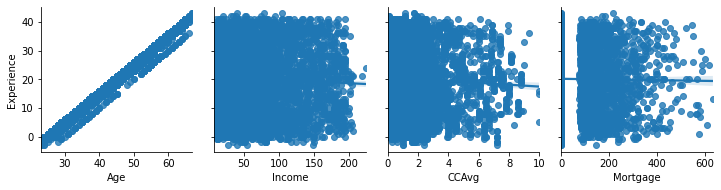

In [21]:

col = ['Age', 'Income','CCAvg', 'Mortgage']  
grid = sb.PairGrid(dt, y_vars = 'Experience', x_vars = col)
grid.map(sb.regplot);

Age and Experience are highly coorelated

2.2 The following code does the below steps:

1) For the record with the ID, get the value of Age column

2) For the record with the ID, get the value of Education column

3) Filter the records matching the above criteria from the data frame which has records with positive experience and take the median

4) Apply the median back to the location which had negative experience





In [22]:
posExp = dt.loc[dt['Experience'] >0]
negExp = dt.Experience < 0
column_name = 'Experience'
neglist = dt.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [23]:
for id in neglist:
    age = dt.loc[np.where(dt['ID']==id)]["Age"].tolist()[0]
    education = dt.loc[np.where(dt['ID']==id)]["Education"].tolist()[0]
    df_filtered = posExp[(posExp.Age == age) & (posExp.Education == education)]
    exp = df_filtered['Experience'].median()
    dt.loc[dt.loc[np.where(dt['ID']==id)].index, 'Experience'] = exp

Clearing data result

In [24]:
dt.Experience.describe()

count    4971.000000
mean       20.243211
std        11.359189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

#STEP 3: EDA: Study the data distribution in each attribute and target variable, share your findings.


3.1 Number of unique in each column

In [25]:
dt.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

-> The ID variable can be ignored as it will not any effect on our model. As we know customer Id is just to maitain the record in serial order. There is no relationship with Id and Loan.

->Nonimal Varibles : Home Address ZIP code of the customer. This variable can also be ignored becasue we can not judge the customers based on thier area or location.

In [26]:
dt = dt.drop(['ID','ZIP Code'], axis=1)  # Dropping ID and ZIP code column
dt.head() 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1


3.2 Number of people with zero mortgage

In [27]:
(dt['Mortgage'] == 0).sum()

3462

3.3 Number of people with zero credit card spending per month

In [28]:
(dt['CCAvg'] == 0).sum()

106

3.4 Value counts of all categorical columns 

In [29]:
dt['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [30]:
dt['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [31]:
dt['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [32]:
dt['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [33]:
dt['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

3.5 Univariate and Bivariate analysis

3.5.1  Univariate

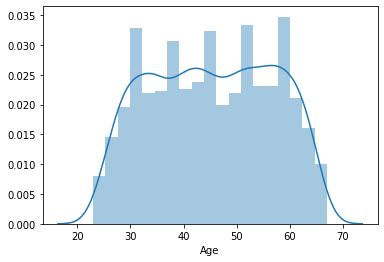

In [35]:
sb.distplot(dt['Age'])

Obs: Age column has symmetric distrubution

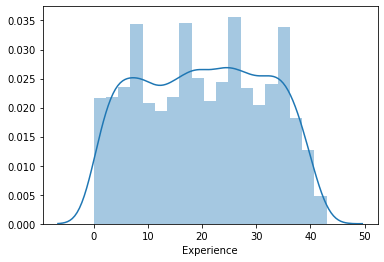

In [36]:
sb.distplot(dt['Experience'])

Obs: Experience column has symmetric distrubution

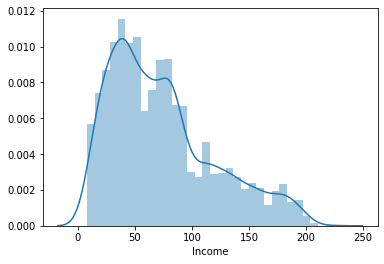

In [37]:
sb.distplot(dt['Income'])

Obs: Income distributionis is right skewed distribution because the tail goes to the right.

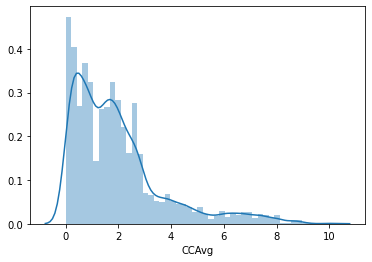

In [38]:
sb.distplot(dt['CCAvg'])

Obs: CCAvg distributionis is right skewed distribution because the tail goes to the right.

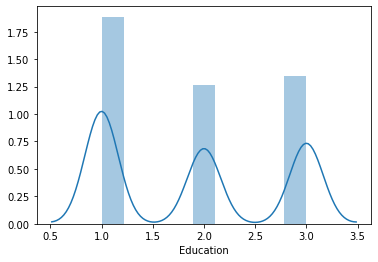

In [39]:
sb.distplot(dt['Education'])

Obs: Undergrad level customers are more than the Graduate and Advanced/Professional customers.

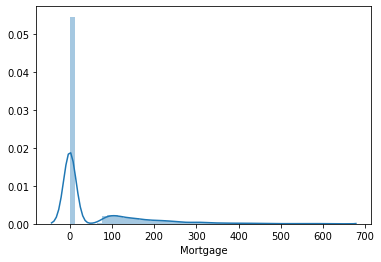

In [40]:
sb.distplot(dt['Mortgage'])

Obs: Mortgage is discontinuous distribution.

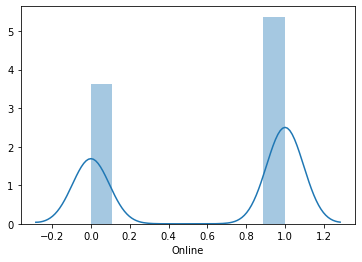

In [41]:
sb.distplot(dt['Online'])

Obs: Number of customers who have Online accout is geater than the number of customers who do not have online account

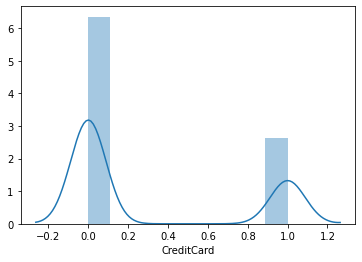

In [42]:
sb.distplot(dt['CreditCard'])

Obs: Number of customers without Credit Card is almost double than the number of customers with Credit Card.

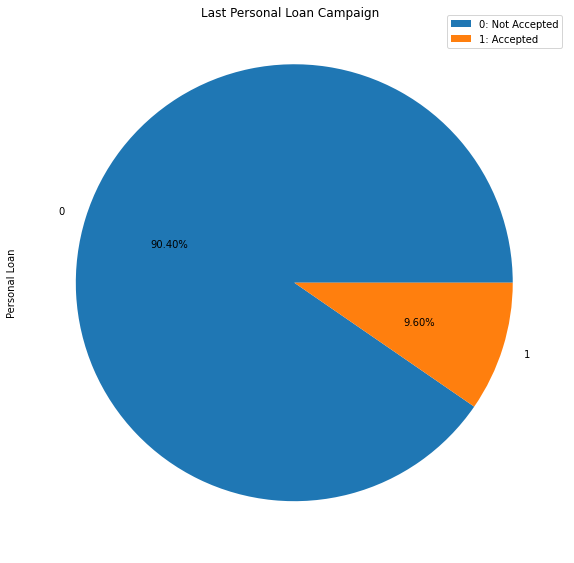

In [43]:
appr_acc = dt['Personal Loan'].value_counts()
explode = (0, 0.15)
label1 = ["0: Not Accepted","1: Accepted"]
appr_acc.plot.pie(subplots=True, figsize=(8,8), title="Last Personal Loan Campaign", autopct='%.2f%%')
plt.legend(label1)
plt.tight_layout()

Obs: There is 90.4 percent acceptance rate.

3.5.2 Multivariate

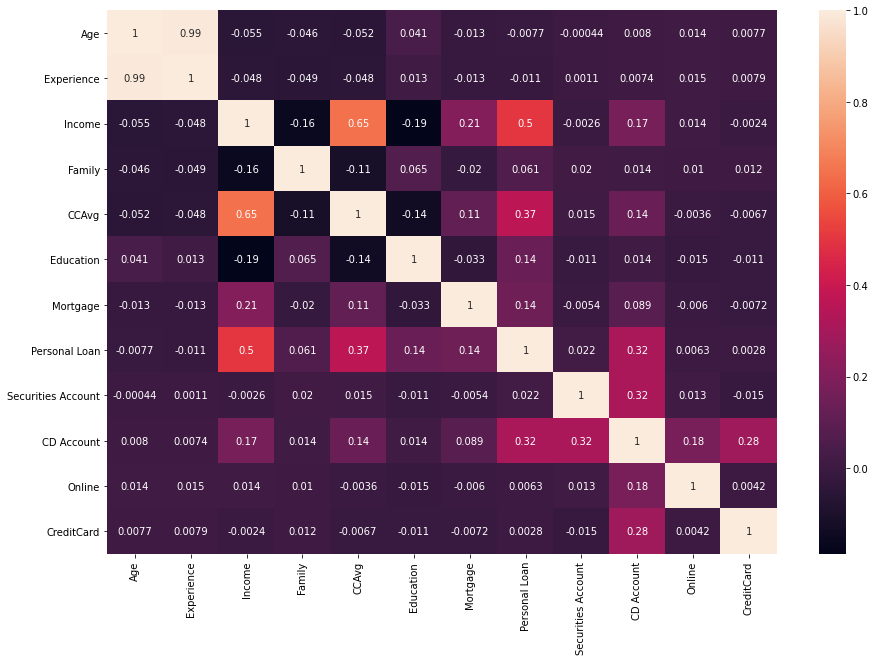

In [44]:
plt.subplots(figsize = (15,10))
sb.heatmap(dt.corr(),annot = True)

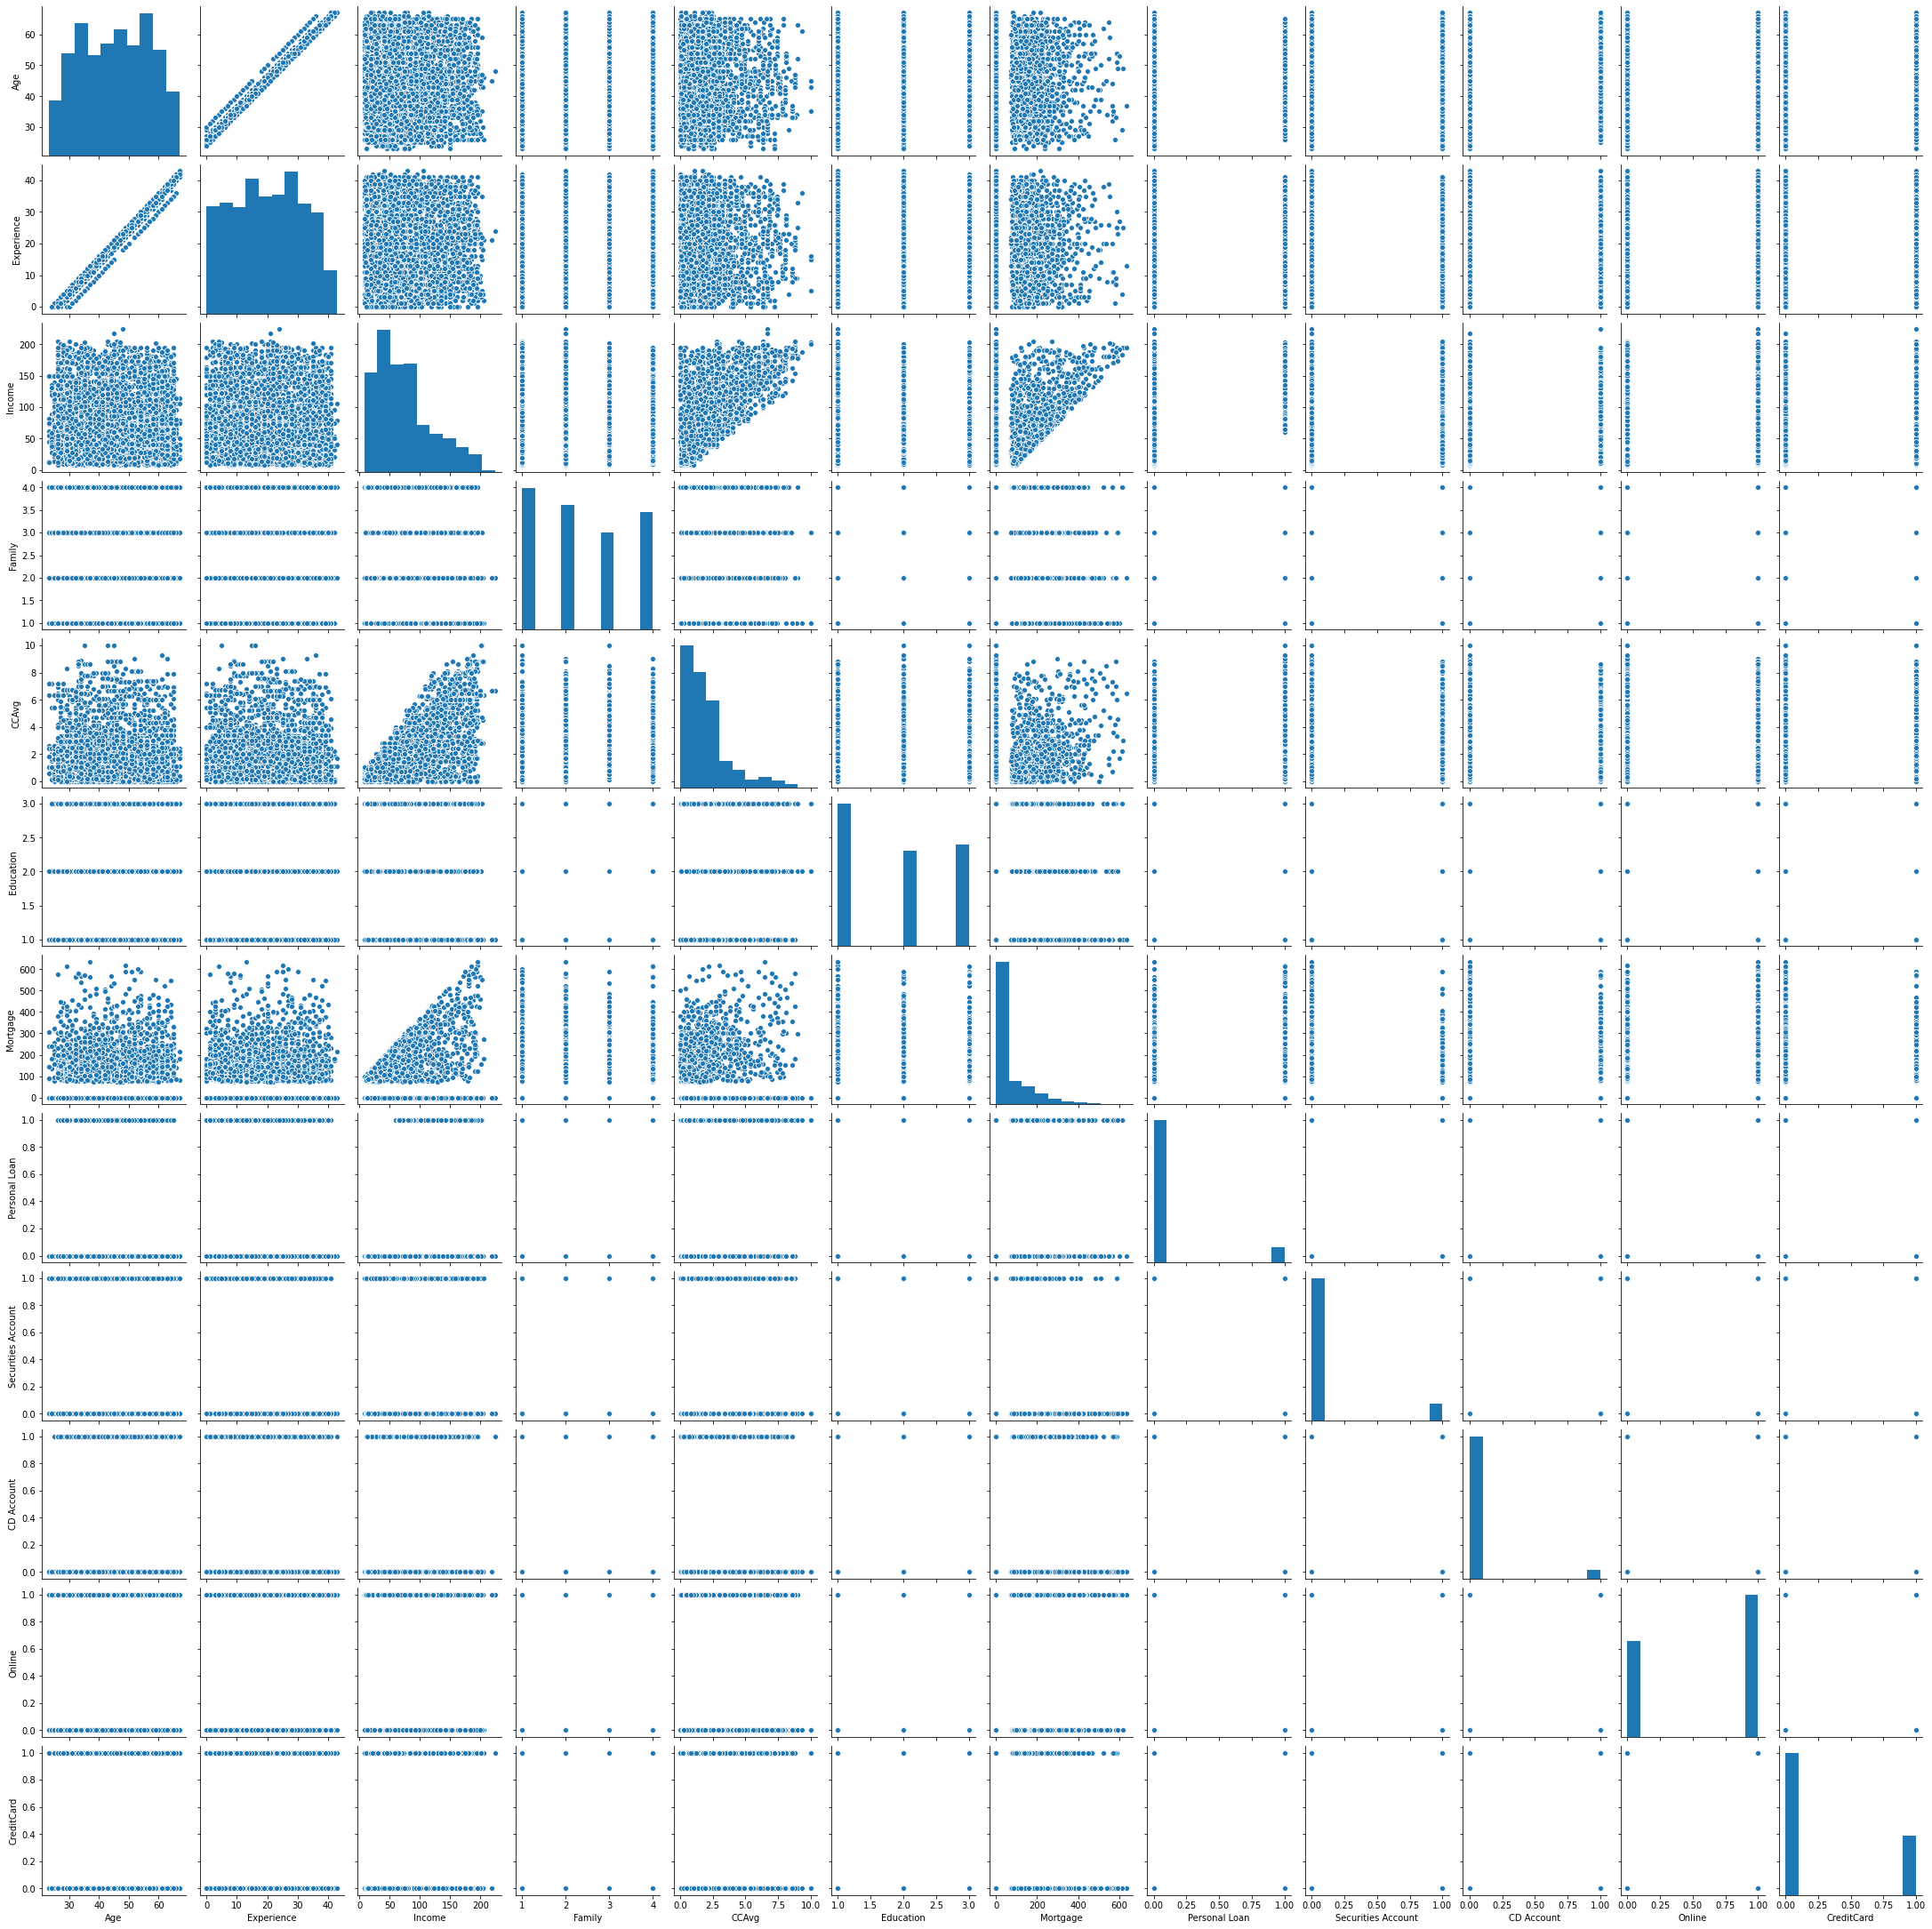

In [45]:
sb.pairplot(dt)

* Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age.
* We can confirm this by looking at the describe statement above, which shows mean is almost equal to median
* Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience.
* This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
* Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
* Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
* The variables family and education are ordinal variables. The distribution of families is evenly distributes





# STEP 4: Apply necessary transformations for the feature variables

We have found out that we have income and ccavg value skewed so we have to transform them.

In [46]:
x = dt[['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account']]
y = dt['Personal Loan'].values  

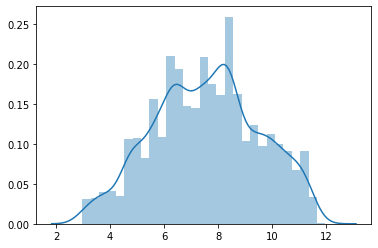

In [47]:
from sklearn.preprocessing import PowerTransformer
pow_t = PowerTransformer(method='yeo-johnson',standardize=False)
pow_t.fit(x['Income'].values.reshape(-1,1))
sb.distplot(pow_t.transform(x['Income'].values.reshape(-1,1)))

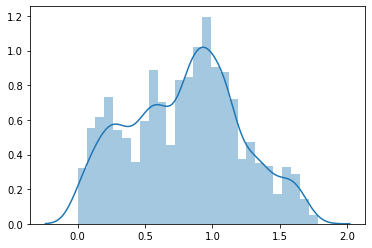

In [48]:
pow_t = PowerTransformer(method='yeo-johnson',standardize=False)
pow_t.fit(x['CCAvg'].values.reshape(-1,1))
sb.distplot(pow_t.transform(x['CCAvg'].values.reshape(-1,1)))

* CCAvg and Income are transformed.
* Now we will transform Mortgage 

In [49]:
bin1 = [0, 100, 200, 300, 400, 500, 600, 700]
label1 = [0, 1, 2, 3, 4, 5, 6]
x['Mortgage_New'] = pd.cut(x['Mortgage'], bins = bin1, labels = label1, include_lowest = True)
x.drop('Mortgage', axis = 1, inplace = True)
x.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Income,Family,CCAvg,Online,CreditCard,Education,Securities Account,CD Account,Mortgage_New
0,25,49,4,1.6,0,0,1,1,0,0
1,45,34,3,1.5,0,0,1,1,0,0
2,39,11,1,1.0,0,0,1,0,0,0
3,35,100,1,2.7,0,0,2,0,0,0
4,35,45,4,1.0,0,1,2,0,0,0
5,37,29,4,0.4,1,0,2,0,0,1
6,53,72,2,1.5,1,0,2,0,0,0
7,50,22,1,0.3,0,1,3,0,0,0
8,35,81,3,0.6,1,0,2,0,0,1
9,34,180,1,8.9,0,0,3,0,0,0


# STEP 5: Normalise your data and split the data into training and test set in the ratio of 70:30 respectively

In [50]:
from sklearn.model_selection import train_test_split # importing necessary libary for splliting and scaling
from sklearn import preprocessing

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [54]:
col_names = dt.columns
scaler = preprocessing.StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)  #Scaled values for train dataset.
scaled_X_test=scaler.fit_transform(X_test)    #Scaled values for test dataset.

# STEP 6: Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.

In [52]:
from sklearn.linear_model import LogisticRegression # importing logistic regression library
from sklearn import metrics

In [55]:
log_reg = LogisticRegression()
log_reg.fit(scaled_X_train,y_train)
y_pred = log_reg.predict(scaled_X_test)

# STEP 7: Print all the metrics related for evaluating the model performance

In [56]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score:",metrics.r2_score(y_test,y_pred))
print("Accuracy Score:",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,log_reg.predict(scaled_X_train)))
print("f1 score",metrics.f1_score(y_test,y_pred))
print("Roc Area under curve score",metrics.roc_auc_score(y_test,y_pred))


Mean Absolute Error: 0.04533333333333334
R2 Score: 0.41918731778425666
Accuracy Score: 0.9546666666666667
Accuracy score for train data 0.9511428571428572
f1 score 0.7017543859649122
Roc Area under curve score 0.8052113702623906


In [57]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1372
           1       0.80      0.62      0.70       128

    accuracy                           0.95      1500
   macro avg       0.88      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500



Confusion Matrix


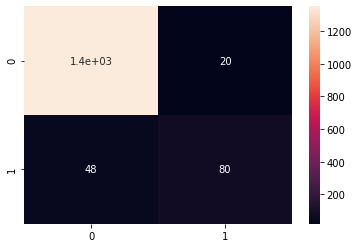

In [58]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(cm,annot=True)

# STEP 8: Build various other classification algorithms and compare their performance

---------------------------------KNN---------------------------------------------

8.1 KNN Model

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [61]:
y_pred=knn.predict(scaled_X_test)

8.1.1 KNN Model Analysis

In [62]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score:",metrics.r2_score(y_test,y_pred))
print("Accuracy Score:",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,knn.predict(scaled_X_train)))
print("f1 score",metrics.f1_score(y_test,y_pred))
print("Roc Area under curve score",metrics.roc_auc_score(y_test,y_pred))


Mean Absolute Error: 0.03133333333333333
R2 Score: 0.5985559402332362
Accuracy Score: 0.9686666666666667
Accuracy score for train data 0.9794285714285714
f1 score 0.7929515418502202
Roc Area under curve score 0.8482826166180758


In [63]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1372
           1       0.91      0.70      0.79       128

    accuracy                           0.97      1500
   macro avg       0.94      0.85      0.89      1500
weighted avg       0.97      0.97      0.97      1500



Confusion Matrix


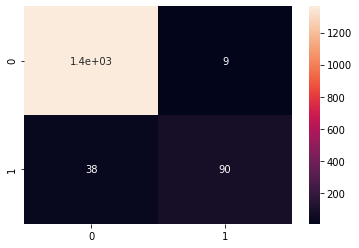

In [64]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(cm,annot=True)

----------------------------------RFC------------------------------------------

8.2 Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc=RandomForestClassifier(n_estimators=500,max_depth=8,random_state=0)
rfc.fit(scaled_X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [67]:
y_pred=rfc.predict(scaled_X_test)

8.2.1 Random Forest Classifier Analysis

In [68]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score:",metrics.r2_score(y_test,y_pred))
print("Accuracy Score:",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,rfc.predict(scaled_X_train)))
print("f1 score",metrics.f1_score(y_test,y_pred))
print("Roc Area under curve score",metrics.roc_auc_score(y_test,y_pred))

Mean Absolute Error: 0.012666666666666666
R2 Score: 0.8377141034985423
Accuracy Score: 0.9873333333333333
Accuracy score for train data 0.9945714285714286
f1 score 0.9236947791164659
Roc Area under curve score 0.9470321610787171


In [69]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1372
           1       0.95      0.90      0.92       128

    accuracy                           0.99      1500
   macro avg       0.97      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500



Confusion Matrix


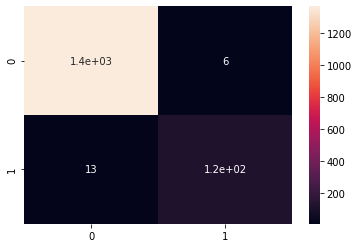

In [70]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(cm,annot=True)

---------------------------------------G-N-B-----------------------------------

8.3 Gaussian-Naive-Bayes Model

In [71]:
from sklearn.naive_bayes import GaussianNB
naiv = GaussianNB()
naiv.fit(scaled_X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [72]:
y_pred=naiv.predict(scaled_X_test)

8.3.1 Gaussian-Naive-Bayes Model Analysis

In [73]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score:",metrics.r2_score(y_test,y_pred))
print("Accuracy Score:",metrics.accuracy_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,naiv.predict(scaled_X_train)))
print("f1 score",metrics.f1_score(y_test,y_pred))
print("Roc Area under curve score",metrics.roc_auc_score(y_test,y_pred))


Mean Absolute Error: 0.114
R2 Score: -0.4605730685131193
Accuracy Score: 0.886
Accuracy score for train data 0.8797142857142857
f1 score 0.4770642201834862
Roc Area under curve score 0.7605912900874635


In [74]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1372
           1       0.39      0.61      0.48       128

    accuracy                           0.89      1500
   macro avg       0.68      0.76      0.71      1500
weighted avg       0.91      0.89      0.90      1500



Confusion Matrix


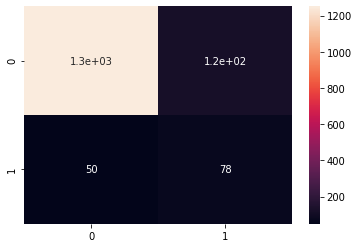

In [75]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(cm,annot=True)

# STEP 9: Give a business understanding of your model

* From this project it evident that Machine Learning plays an important role in analysis for banks and it surely helps them to save alot of money and at the same time increases the chance of profit.
* There are various algorithm which can help in prediction of potential customer out of which four of them is applied in the+ project -

1.   Linear Regression
2.   KNN
3.   Random Forest 
4.   Gaussian-Naive-Bayes 

* Out of the four Random Forest has Highest prediction accuracy(98.74%) followed by KNN(96.86%), Logistic Regression(95.46%) and Gaussian-Naive-Bayes Model(88.6).

* The project also explains that various factors such as age,education,transaction,etc; can effect the probablity of a person opting for a loan and is not dependent only on the income of the person.



